In [1]:
import math
import numpy as np
from numpy.testing import assert_allclose

from tqdm import tqdm

import matplotlib.pyplot as plt

from numcosmo_py import Nc, Ncm
from numcosmo_py.plotting.tools import set_rc_params_article

In [2]:
Ncm.cfg_init()

In [3]:
cosmo = Nc.HICosmoQGRW()
cosmo.props.w = 1.0e-5
cosmo.props.Omegar = 1.0 * (1.0e-5)
cosmo.props.Omegaw = 1.0 * (1.0 - 1.0e-5)
cosmo.props.xb = 1.0e30

k = 1.0
min_alpha_c = -120.0
max_alpha_c = -1.0
min_alpha_scale = 1.0e-12
np_plot = 1000

# Time arrays for the contraction and bounce phases

alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)
alpha_b_e = np.geomspace(min_alpha_scale, 2.0, np_plot)
alpha_b = np.concatenate((np.flip(-alpha_b_e), alpha_b_e))

# Computing background observables in the contraction phase

m_s_c = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_c])
m_zeta_c = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_c])
mnu2_s_c = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_c])
mnu2_zeta_c = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_c])
nu1_c = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_c])
nu2_c = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_c])
nu_s_c = np.sqrt(mnu2_s_c / m_s_c)
nu_zeta_c = np.sqrt(mnu2_zeta_c / m_zeta_c)
y_c = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_c])
gamma11_c = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_c])
gamma22_c = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_c])
gamma12_c = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_c])
tau_c = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_c])

# Computing background observables in the bounce phase

m_s_b = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_b])
m_zeta_b = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_b])
mnu2_s_b = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_b])
mnu2_zeta_b = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_b])
nu1_b = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_b])
nu2_b = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_b])
nu_s_b = np.sqrt(mnu2_s_b / m_s_b)
nu_zeta_b = np.sqrt(mnu2_zeta_b / m_zeta_b)
y_b = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_b])
gamma11_b = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_b])
gamma22_b = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_b])
gamma12_b = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_b])
tau_b = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_b])

cos2_phi_c = (nu1_c**2 * nu_zeta_c**2 - nu2_c**2 * nu_s_c**2) / (nu1_c**4 - nu2_c**4)
sin2_phi_c = (nu1_c**2 * nu_s_c**2 - nu2_c**2 * nu_zeta_c**2) / (nu1_c**4 - nu2_c**4)

cos2_phi_b = (nu1_b**2 * nu_zeta_b**2 - nu2_b**2 * nu_s_b**2) / (nu1_b**4 - nu2_b**4)
sin2_phi_b = (nu1_b**2 * nu_s_b**2 - nu2_b**2 * nu_zeta_b**2) / (nu1_b**4 - nu2_b**4)

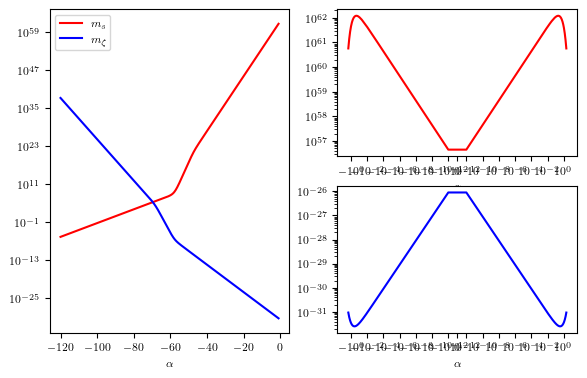

In [4]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

ax1.plot(alpha_c, m_s_c, c="r", label=r"$m_s$")
ax1.plot(alpha_c, m_zeta_c, c="b", label=r"$m_\zeta$")
ax1.set_yscale("log")
ax1.set_xlabel(r"$\alpha$")

ax2.plot(alpha_b, m_s_b, c="r", label=r"$m_s$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("log")
ax2.set_xlabel(r"$\alpha$")

ax3.plot(alpha_b, m_zeta_b, c="b", label=r"$m_\zeta$")
ax3.set_xscale("symlog", linthresh=min_alpha_scale)
ax3.set_yscale("log")
ax3.set_xlabel(r"$\alpha$")

ax1.legend()

pass

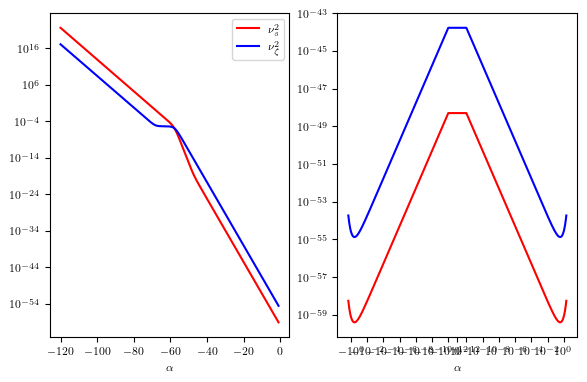

In [5]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_c, mnu2_s_c / m_s_c, c="r", label=r"$\nu_s^2$")
ax1.plot(alpha_c, mnu2_zeta_c / m_zeta_c, c="b", label=r"$\nu_\zeta^2$")
ax1.set_yscale("log")
ax1.set_xlabel(r"$\alpha$")
ax1.legend()

ax2.plot(alpha_b, mnu2_s_b / m_s_b, c="r", label=r"$\nu_s^2$")
ax2.plot(alpha_b, mnu2_zeta_b / m_zeta_b, c="b", label=r"$\nu_\zeta^2$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("log")
ax2.set_xlabel(r"$\alpha$")

pass

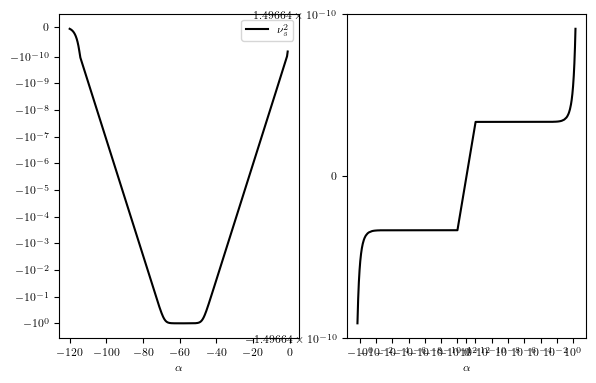

In [6]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_c, y_c * np.sqrt(m_s_c * m_zeta_c), c="k", label=r"$\nu_s^2$")
ax1.set_yscale("symlog", linthresh=1.0e-10)
ax1.set_xlabel(r"$\alpha$")

ax2.plot(alpha_b, y_b * np.sqrt(m_s_b * m_zeta_b), c="k", label=r"$\nu_s^2$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("symlog")
ax2.set_xlabel(r"$\alpha$")

ax1.legend()

pass

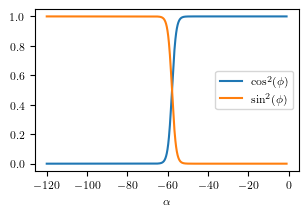

In [7]:
set_rc_params_article(ncol=1)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(alpha_c, cos2_phi_c, label=r"$\cos^2(\phi)$")
ax1.plot(alpha_c, sin2_phi_c, label=r"$\sin^2(\phi)$")
ax1.set_xlabel(r"$\alpha$")
ax1.legend()
pass

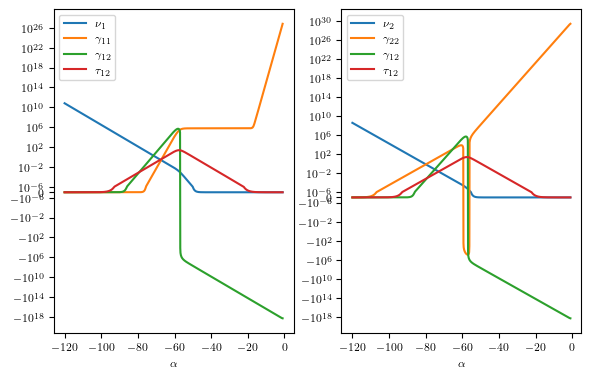

In [8]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_c, nu1_c, label=r"$\nu_1$")
ax1.plot(alpha_c, gamma11_c, label=r"$\gamma_{11}$")
ax1.plot(alpha_c, gamma12_c, label=r"$\gamma_{12}$")
ax1.plot(alpha_c, tau_c, label=r"$\tau_{12}$")

ax1.set_yscale("symlog", linthresh=1.0e-6)
ax1.set_xlabel(r"$\alpha$")
ax1.legend()

ax2.plot(alpha_c, nu2_c, label=r"$\nu_2$")
ax2.plot(alpha_c, gamma22_c, label=r"$\gamma_{22}$")
ax2.plot(alpha_c, gamma12_c, label=r"$\gamma_{12}$")
ax2.plot(alpha_c, tau_c, label=r"$\tau_{12}$")

ax2.set_yscale("symlog", linthresh=1.0e-6)
ax2.set_xlabel(r"$\alpha$")
ax2.legend()

pass

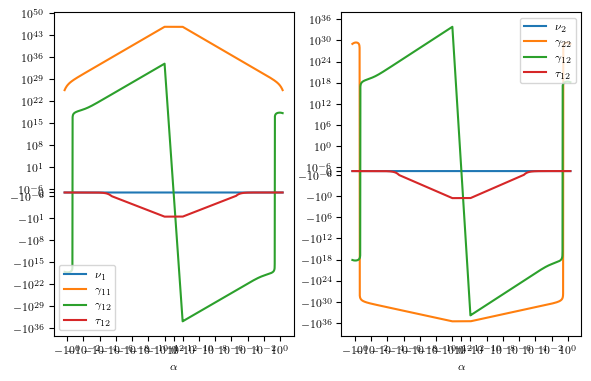

In [9]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(alpha_b, nu1_b, label=r"$\nu_1$")
ax1.plot(alpha_b, gamma11_b, label=r"$\gamma_{11}$")
ax1.plot(alpha_b, gamma12_b, label=r"$\gamma_{12}$")
ax1.plot(alpha_b, tau_b, label=r"$\tau_{12}$")
ax1.set_xscale("symlog", linthresh=min_alpha_scale)
ax1.set_yscale("symlog", linthresh=1.0e-6)
ax1.set_xlabel(r"$\alpha$")

ax1.legend()

ax2.plot(alpha_b, nu2_b, label=r"$\nu_2$")
ax2.plot(alpha_b, gamma22_b, label=r"$\gamma_{22}$")
ax2.plot(alpha_b, gamma12_b, label=r"$\gamma_{12}$")
ax2.plot(alpha_b, tau_b, label=r"$\tau_{12}$")
ax2.set_xscale("symlog", linthresh=min_alpha_scale)
ax2.set_yscale("symlog", linthresh=1.0e-6)
ax2.set_xlabel(r"$\alpha$")
ax2.legend()

pass

In [10]:
def get_zeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.ZETA_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.ZETA_I
    )


def get_S(v):
    return v.get(Nc.HIPertITwoFluidsVars.S_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.S_I
    )


def get_Pzeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.PZETA_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.PZETA_I
    )


def get_PS(v):
    return v.get(Nc.HIPertITwoFluidsVars.PS_R) + 1.0j * v.get(
        Nc.HIPertITwoFluidsVars.PS_I
    )

In [41]:
pgw = Nc.HIPertGW.new()
pgw.set_initial_condition_type(Ncm.CSQ1DInitialStateType.ADIABATIC4)
pgw.set_k(1.0e0)
pgw.set_ti(-cosmo.abs_alpha(1.0e-24))
pgw.set_tf(-1.0)

pgw.set_vacuum_max_time(-1.0)
pgw.set_vacuum_reltol(1.0e-6)
pgw.prepare(cosmo)



In [35]:
t_a, _smaller_abst = pgw.get_time_array()
state = Ncm.CSQ1DState.new()

phi_a = []

for t in t_a:
    state = pgw.eval_at(cosmo, t, state)
    phi_vec, Pphi_vec = state.get_phi_Pphi()
    phi = phi_vec[0] + 1.0j * phi_vec[1]
    Pphi = Pphi_vec[0] + 1.0j * Pphi_vec[1]

    phi_a.append(phi)


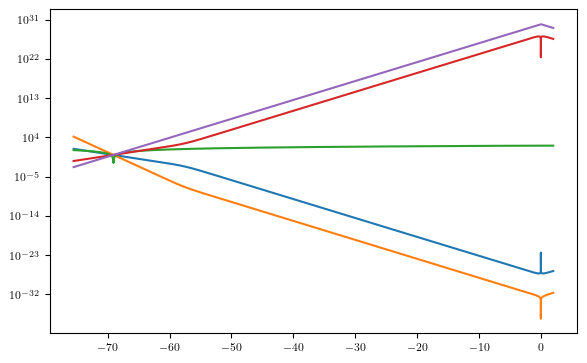

In [36]:

plt.plot(t_a, [Nc.HIPertIGW.eval_nu(cosmo, t, k) for t in t_a])
plt.plot(t_a, [Nc.HIPertIGW.eval_m(cosmo, t, k) for t in t_a])
plt.plot(t_a, np.abs([Nc.HIPertIGW.eval_xi(cosmo, t, k) for t in t_a]))
plt.plot(t_a, np.abs([Nc.HIPertIGW.eval_F1(cosmo, t, k) for t in t_a]))
plt.plot(t_a, np.abs([Nc.HIPertIGW.eval_x(cosmo, t) for t in t_a]))
plt.yscale("log")

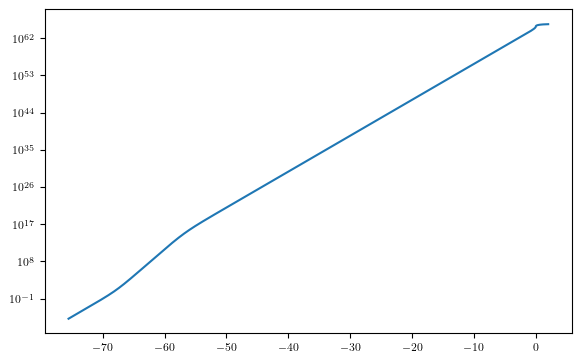

In [42]:
plt.plot(t_a, (np.abs(phi_a))**2)
plt.yscale("log")

In [39]:
pert = Nc.HIPertTwoFluids.new()
pert.props.reltol = 1.0e-9

spec1 = pert.compute_zeta_spectrum(cosmo, 1, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e8, 100)
spec2 = pert.compute_zeta_spectrum(cosmo, 2, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e8, 100)


In [44]:
%%time
lnk_a1 = np.array(spec1.peek_xv().dup_array())

spec_gw = []
for lnk in lnk_a1:
    k = np.exp(lnk)
    pgw.set_k(k)
    pgw.prepare(cosmo)
    state = pgw.eval_at(cosmo, -1.0, state)
    phi_vec, Pphi_vec = state.get_phi_Pphi()
    phi = phi_vec[0] + 1.0j * phi_vec[1]

    spec_gw.append(k**3 * np.abs(phi)**2)

CPU times: user 1.18 s, sys: 3.28 ms, total: 1.18 s
Wall time: 1.18 s


Text(0.5, 0, '$k$')

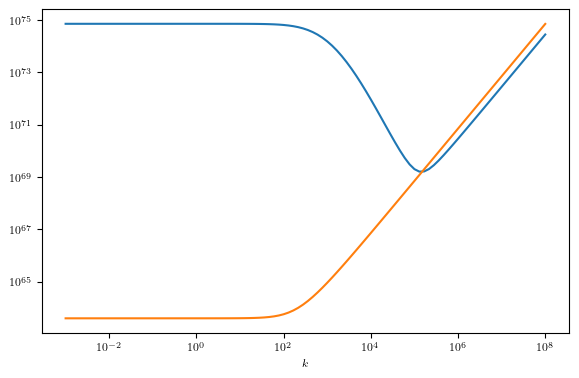

In [46]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

lnk_a1 = np.array(spec1.peek_xv().dup_array())
lnPk_a1 = np.array(spec1.peek_yv().dup_array())

lnk_a2 = np.array(spec2.peek_xv().dup_array())
lnPk_a2 = np.array(spec2.peek_yv().dup_array())

ax1.plot(
    np.exp(lnk_a2),
    (np.exp(lnPk_a2) + np.exp([spec1.eval(lnk) for lnk in lnk_a2])),
    label=r"$k^3|\zeta|^2$",
)

ax1.plot(np.exp(lnk_a1), spec_gw)

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")


In [14]:
%%time

def spec_params(Omegars = 1.0e-5, w = 1.0e-3, E0 = 1.0):
    cosmo.props.w = w
    cosmo.props.Omegar = E0 * Omegars
    cosmo.props.Omegaw = E0 * (1.0 - Omegars)
    
    pert = Nc.HIPertTwoFluids.new()
    pert.props.reltol = 1.0e-9
    
    spec1 = pert.compute_zeta_spectrum(cosmo, 1, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e8, 100)
    spec2 = pert.compute_zeta_spectrum(cosmo, 2, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e8, 100)

    return spec1, spec2

specs1 = []
specs2 = []
w_a = np.geomspace(1.0e-5, 1.0e-1, 50)
for w in w_a:
    spec1, spec2 = spec_params(w=w)
    specs1.append(spec1)
    specs2.append(spec2)


KeyboardInterrupt: 

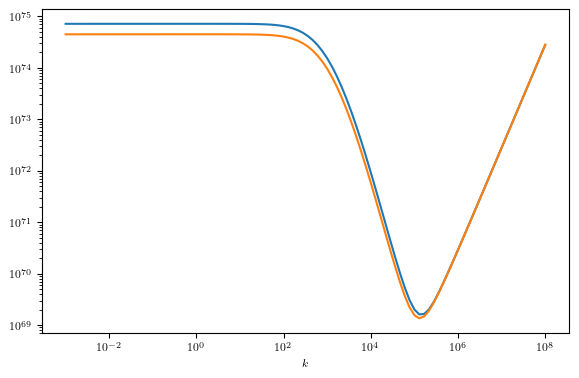

In [15]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

for spec1, spec2, w in zip(specs1, specs2, w_a):

    lnk_a1 = np.array(spec1.peek_xv().dup_array())
    lnPk_a1 = np.array(spec1.peek_yv().dup_array())

    lnk_a2 = np.array(spec2.peek_xv().dup_array())
    lnPk_a2 = np.array(spec2.peek_yv().dup_array())

    ax1.plot(
        np.exp(lnk_a2),
        (np.exp(lnPk_a2) + np.exp([spec1.eval(lnk) for lnk in lnk_a2])),
        label=r"$k^3|\zeta|^2$",
    )

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")
# ax1.legend()

pass

In [16]:
lnk_v = specs1[0].peek_xv()
lnw_v = Ncm.Vector.new_array(np.log(w_a))
zm = Ncm.Matrix.new(lnw_v.len(), lnk_v.len())

for i, (spec1, spec2, w) in enumerate(zip(specs1, specs2, w_a)):
    lnPk_a1 = np.array(spec1.peek_yv().dup_array())
    lnPk_a2 = np.array(spec2.peek_yv().dup_array())

    lnPk0 = np.log(np.exp(lnPk_a1[0]) + np.exp(lnPk_a2[0]))
    lnPk = np.log(np.exp(lnPk_a1) + np.exp(lnPk_a2)) - lnPk0
    lnPk_v = Ncm.Vector.new_array(lnPk)

    zm.set_row(i, lnPk_v)

In [17]:
s = Ncm.Spline2dBicubic.notaknot_new()
s.set(lnk_v, lnw_v, zm, True)

In [18]:
for i, (spec1, spec2, w) in enumerate(zip(specs1, specs2, w_a)):
    lnk_a1 = np.array(spec1.peek_xv().dup_array())
    lnPk_a1 = np.array(spec1.peek_yv().dup_array())

    lnk_a2 = np.array(spec2.peek_xv().dup_array())
    lnPk_a2 = np.array(spec2.peek_yv().dup_array())
    lnPk0 = np.log(np.exp(lnPk_a1[0]) + np.exp(lnPk_a2[0]))
    lnPk = np.log(np.exp(lnPk_a1) + np.exp(lnPk_a2)) - lnPk0

    lnPk_eval = np.array([s.eval(lnk, np.log(w)) for lnk in lnk_a1])

    # assert_allclose(lnPk, lnPk_eval, rtol=1.0e-12)

In [19]:
hiprim_2f = Nc.HIPrimTwoFluids()
hiprim_pl = Nc.HIPrimPowerLaw()
hiprim_2f.set_lnk_lnw_spline(s)

Error in callback <function _draw_all_if_interactive at 0x79253f9fcfe0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

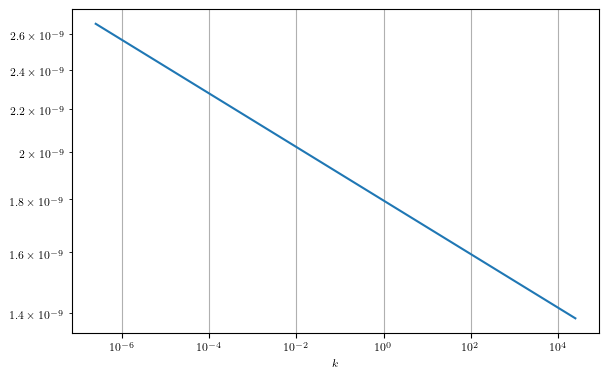

In [20]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

lnk_a = np.linspace(np.log(1.0e-3), np.log(1.0e8), 1000)
lnw_a = np.linspace(np.log(1.0e-5), np.log(1.0e-1), 100)

lnPk = np.array([hiprim_pl.lnSA_powspec_lnk(lnk) for lnk in lnk_a])
ax1.plot(np.exp(lnk_a) / 4000.0, np.exp(lnPk), label=r"$k^3|\zeta|^2$")
hiprim_2f.props.lnk0 = 0.0

for lnw in lnw_a[::10]:
    hiprim_2f.props.lnw = lnw

    lnPk = np.array([hiprim_2f.lnSA_powspec_lnk(lnk) for lnk in lnk_a])

    ax1.plot(np.exp(lnk_a) / 4000.0, np.exp(lnPk), label=r"$k^3|\zeta|^2$")

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")
# ax1.legend()
ax1.grid()

pass

In [21]:
def compute_D_ell(hiprim, lmax=2500):
    lmax = 2500

    cbe_prec = Nc.CBEPrecision.new()
    cbe_prec.props.k_per_decade_primordial = 50.0
    cbe_prec.props.tight_coupling_approximation = 0

    cbe = Nc.CBE.prec_new(cbe_prec)

    Bcbe = Nc.HIPertBoltzmannCBE.full_new(cbe)
    Bcbe.set_TT_lmax(lmax)
    Bcbe.set_target_Cls(Nc.DataCMBDataType.TT)
    Bcbe.set_lensed_Cls(True)

    cosmo = Nc.HICosmoDEXcdm.new()
    cosmo.omega_x2omega_k()
    cosmo.param_set_by_name("Omegak", 0.0)

    reion = Nc.HIReionCamb.new()

    cosmo.add_submodel(reion)
    cosmo.add_submodel(hiprim)

    Bcbe.prepare(cosmo)

    Cls_2f = Ncm.Vector.new(lmax + 1)

    Bcbe.get_TT_Cls(Cls_2f)

    Cls_2f_a = np.array(Cls_2f.dup_array())
    Cls_2f_a = np.array(Cls_2f_a[2:])

    ell = np.array(list(range(2, lmax + 1)))

    Dls_2f_a = ell * (ell + 1.0) * Cls_2f_a
    return ell, Dls_2f_a

In [22]:
hiprim_2f.props.lnk0 = -1.8
hiprim_2f.props.lnw = np.log(1.0e-4)

ell, Dell_2f = compute_D_ell(hiprim_2f)
_, Dell_pl = compute_D_ell(hiprim_pl)

KeyboardInterrupt: 

In [ ]:
plt.title(r"$D_\ell$")
plt.plot(ell, Dell_2f, "r", label="two-fluids")
plt.plot(ell, Dell_pl, "b--", label="power-law")

plt.xscale("log")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)C_\ell$")
plt.legend(loc="best")
plt.savefig("hiprim_Dls.pdf")

In [ ]:
# ser = Ncm.Serialize.new(Ncm.SerializeOpt.CLEAN_DUP)
# ser.to_binfile(s, "hiprim_2f_spline.bin")

In [ ]:
test_hiprim_2f = Nc.HIPrimTwoFluids(use_default_calib=True)

In [ ]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

lnk_a = np.linspace(np.log(1.0e-3), np.log(1.0e8), 1000)
lnw_a = np.linspace(np.log(1.0e-7), np.log(1.0e-1), 100)
hiprim_2f.props.lnk0 = 0.0
test_hiprim_2f.props.lnk0 = 0.0

for lnw in lnw_a[::10]:
    hiprim_2f.props.lnw = lnw
    test_hiprim_2f.props.lnw = lnw

    lnPk_test = np.array([test_hiprim_2f.lnSA_powspec_lnk(lnk) for lnk in lnk_a])
    lnPk = np.array([hiprim_2f.lnSA_powspec_lnk(lnk) for lnk in lnk_a])

    ax1.plot(np.exp(lnk_a) / 4000.0, np.exp(lnPk_test))
    # ax1.plot(np.exp(lnk_a) / 4000.0, np.exp(lnPk))

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$k$")
# ax1.legend()

pass